In [0]:
pip -q install torchvision==0.2.2.post3

In [0]:
!pip install torch==0.3.1

  Using cached https://files.pythonhosted.org/packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: torch 0.4.1
    Uninstalling torch-0.4.1:
      Successfully uninstalled torch-0.4.1


In [0]:
!pip install fastai==0.7.0

In [0]:
!pip install torchtext==0.2.3

In [0]:
from fastai.imports import *

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
arch = resnet34

In [0]:
size = 299

In [0]:
batch_size = 60

In [0]:
# Check is Link to Drive is OK
google = !if [ -d 'GDrive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/GDrive/')
!if [ -d 'GDrive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

Connection to Google drive successful


In [0]:
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil  > /dev/null
!pip install psutil  > /dev/null
!pip install humanize  > /dev/null

In [0]:
import psutil
import humanize
import os
import GPUtil as GPU

In [0]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn't guaranteed
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.7 GB  I Proc size: 303.0 MB
GPU RAM Free: 11430MB | Used: 11MB | Util   0% | Total 11441MB


In [0]:
!pip install torch==0.4.1

In [0]:
data = ImageClassifierData.from_paths("GDrive/My Drive/CarCrashDetection/Dataset/", tfms=tfms_from_model(arch, size), bs=batch_size)
try:
  learn = ConvLearner.pretrained(arch, data, precompute=True)                   # Colab generates a "runtime error due to gpu memory shortage" and pretrain can not finalize
except:
  learn = ConvLearner.pretrained(arch, data, precompute=True)                   # Launched again, it will continue and will finalize pretrain properly


/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [0]:
epoch = 50
learn.fit(0.001, epoch )

import time
hora = time.strftime("%y%m%d-%H%M")

print ("Size = " + str(size))
print ("Batch size = " + str(batch_size))

model_name = "carCrash" + hora +"_sz"+str(size)+"_bs"+str(batch_size)+"_ep"+str(epoch)

print ("Saving model as:", model_name, ".h5")
learn.save(model_name)
print ("Model saved successfully")

In [0]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [0]:
data.classes

['accident', 'no_accident']

In [0]:
log_preds = learn.predict()
log_preds.shape

(379, 2)

In [0]:
log_preds[:10]

array([[-1.85993, -0.16923],
       [-1.7229 , -0.19668],
       [-1.89284, -0.16328],
       [-1.57976, -0.2307 ],
       [-2.35689, -0.0995 ],
       [-1.66384, -0.20999],
       [-1.50632, -0.25068],
       [-1.48135, -0.2579 ],
       [-0.36579, -1.18303],
       [-1.09073, -0.40943]], dtype=float32)

In [0]:
import numpy as np

preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(no_accident)

In [0]:
def rand_by_mask(mask): 
    return np.random.choice(np.where(mask)[0], 4, replace=False)

def rand_by_correct(is_correct): 
    return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): 
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [0]:
!pwd

/content


In [0]:
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"

In [0]:
!pip install Pillow==5.3.0

     |████████████████████████████████| 2.0MB 6.4MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


In [0]:
model_name = "carCrash190721-0847_sz299_bs60_ep150"

In [0]:
arch=resnet34
sz = 299                                                                        # Type same size used during model creation. If you donwloaded the model, a new precomputed activations will be generated.
batch_size = 60                                                                 # Type same batch_size used during model creation. If you donwloaded the model, a new precomputed activations will be generated.
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), bs=batch_size)     
learn = ConvLearner.pretrained(arch, data, precompute=True)


print ( "Loading model:", model_name,".h5\n")
learn.load(model_name)
print ( "Model loaded")

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


Loading model: carCrash190721-0847_sz299_bs60_ep150 .h5

Model loaded


(360, 640, 3)


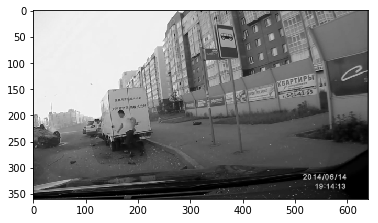

In [0]:
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/valid/accident/"
fn = "frame1240.png"

#PATH = "GDrive/My Drive/CarCrashDetection/Dataset/valid/no_accident/"
#fn = "frame1348.png"

img = open_image(PATH+fn)

print(img.shape)
plt.imshow(img);

In [0]:
trn_tfms, val_tfms = tfms_from_model(arch,sz)      # get transformations
im = val_tfms (img)

learn.precompute = False                             # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
np.argmax(preds)                                   # preds are log probabilities of classes

0

In [0]:
!pip install --upgrade pip > /dev/null
!pip install scikit-image==0.14.2
!pip install opencv-python==3.4.0.12

     |████████████████████████████████| 25.3MB 1.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0
     |████████████████████████████████| 24.9MB 34.3MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1 which is incompatible.
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.4.0.12 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [0]:
import random                           # Generates random numbers
import os                               # Create directories, list files

from shutil import copyfile             # Copy files from Source to Destination

import cv2                              # To flip images in data augmentation
import matplotlib.pyplot as plt         # To save the images
import matplotlib.image as mpimg

In [0]:
import cv2

from skimage.color import rgb2gray
from skimage.transform import resize

import matplotlib.pyplot as plt
import math

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [0]:
lrf = learn.lr_find()

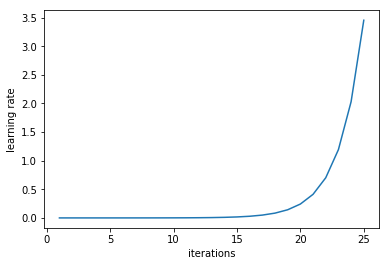

In [0]:
learn.sched.plot_lr()

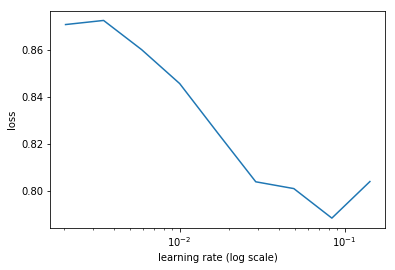

In [0]:
learn.sched.plot()

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [0]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018